# Object Detector
Goal: Build a object detection pipeline that can take in an image, determine what object it is of, then draw a bounding box and label on it.

Methodology:
1. Load test image
2. Load model
3. Classify test image
4. Determine bounding coordinates
5. Draw bounding coordindates
6. Draw label

In [13]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import seaborn as sns
import time

In [2]:
# configure notebook
%matplotlib inline
sns.set()

# configure gpu
os.environ['CUDA_VISIBLE_DEVICES']='0'

## Variables

In [3]:
input_path = 'input_images/cup.jpg'

img_dim = 224

## Functions

In [4]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [5]:
def make_predictions(preprocessed_batch):
    predictions = model.predict(preprocessed_batch)

    # decode the predictions
    decoded_predictions = decode_predictions(predictions, top=1)

    return decoded_predictions

In [19]:
def show_img_and_label(img, label):
    # generate label
    detectedObject = label[0][1]
    detectedConfidence = label[0][2]
    detected = '{}: {}'.format(detectedObject, detectedConfidence)
    
    # generate coords
    fig, ax = plt.subplots(1)
    ax.imshow(img, cmap='gray')
    
    rect = patches.Rectangle((0, 0), img_dim - 1 , img_dim - 1 , linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    
    plt.text(8, 16, detected)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # save the fig
    # create timestamp
    currentTime = time.strftime("%Y%m%d-%H%M%S")
    fig.savefig('output_images/{}.jpg'.format(currentTime), bbox_inches='tight')

## Load Test Image

In [7]:
# load image
input_img_raw = image.load_img(input_path, target_size=(img_dim, img_dim))
input_img_array = image.img_to_array(input_img_raw)
input_img_batch = np.expand_dims(input_img_array, axis=0)
input_img_preprocessed = preprocess_input(input_img_batch)

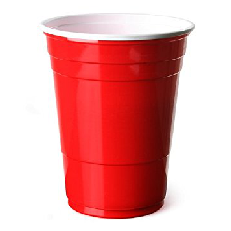

In [8]:
show_img(input_img_raw)

## Load Model

In [9]:
# Load the ResNet50 network
# requires input to be of shape (224, 224, 3)
model = ResNet50(weights='imagenet')

## Make a prediction

Predicted:  [[('n02909870', 'bucket', 0.66390216)]]


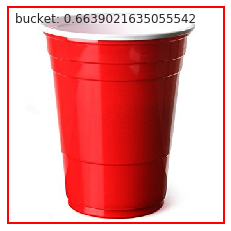

In [20]:
# make a prediction
decoded_predictions = make_predictions(input_img_preprocessed)

# print the prediction
print('Predicted: ', decoded_predictions)

# show the raw image and label
show_img_and_label(input_img_raw, decoded_predictions[0])